# Seaborn Examples

Seaborn python package build on top of `matplotlib` for plotting statistical data. It has great support for the commonly used pandas data structure in handling tabular data. It's more opinionated than `matplotlib` which makes it easier to get started with and provides higher level API for plotting which will help us create plots with fewer number of lines and configuration that we need in `matplotlib` for the same graphics.\
\
Visualizing data using tools like `seaborn` help us explore and understand the data. In this post we'll explore some of the available graphics demonstrate how we can use to plot different data types we might have.\
\
To help with the clarity of this post, I've organized it into six sections. Following this introductory section, we'll see the prerequisite setup and imports. In the setup section I'll discuss the sample datasets that come with `seaborn`. The third and fourth sections are about `seaborn` plots for Categorical and Continues Data, respectively. Then I'll discuss how we can plot comparative plots followed by a section on utilities such as styling and saving plots.

## Setup
### Installation
First step is t install the `seaborn` package. For that, we can use `pip` as

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Imports
To get started with `seaborn` we need to import the following packages. We import `pyplot` form `matplotlib` to use the lower level APIs later for styling and customization. While working with Jupyter notebooks we might want to suppers warnings in the output.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Jupyter Configurations 

Ask Jupyter to display plots within the notebook

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Suppress warnings 

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Data

Plotting only makes sense if we have some data to visualize. We can plot any data stored in pandas data structure using `seaborn`. This let's us load and process data using pandas and use `seaborn` for visualization in parallel. For this post, I'll make use of sample datasets shipped with `seaborn`. To get the full list of datasets available in our installation we can as `seaborn` itself

In [6]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


Let's load two datasets and examine their content. More information on the datasets can be found [here](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Ffivethirtyeight%2Ffivethirtyeight-bad-drivers-dataset) and [here](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Ftitanic%2Fdata)

In [7]:
crashes = sns.load_dataset('car_crashes')
titanic = sns.load_dataset('titanic')

Examine the content of the data

In [8]:
crashes.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [9]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## Categorical Data
Categorical data is form of qualitative data that can be stored and identified based on distinct labels. Instead of being measured numerically, it is a type of information that can be grouped into categories. For example, the sex column in our titanic dataset has two labels: male and female. Similarly the abbrev column is a list of state name abbreviations in the US which has a total of 50 labels.Â 
In this section, we will see bar and count plots from `seaborn` as two graphics to visualize categorical data.\
\
In this section, we will see bar and count plots from `seaborn` as two graphics to visualize categorical data.

### Bar Plots
Also referred to as `bar chart`, bar plot is, a bar plot allows us to visualize the comparisons between the discrete labels or categories in our data. Bar chart is a graph that represents the category of data with horizontally or vertically rectangular bars with lengths and heights that is proportional to the values which they represent. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

<Axes: xlabel='sex', ylabel='fare'>

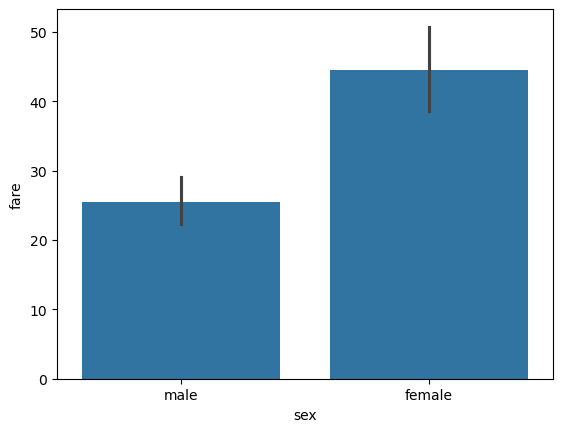

In [10]:
sns.barplot(data = titanic, x = 'sex', y='fare')

By Default the data is aggregated by mean of `y`

<Axes: xlabel='sex', ylabel='fare'>

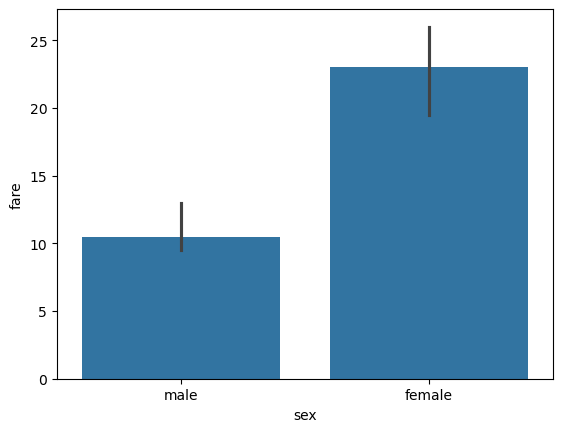

In [11]:
sns.barplot(data = titanic, x = 'sex', y='fare', estimator=np.median)

### Count Plots
Similar to bar plot but uses count as the estimator

<Axes: xlabel='sex', ylabel='count'>

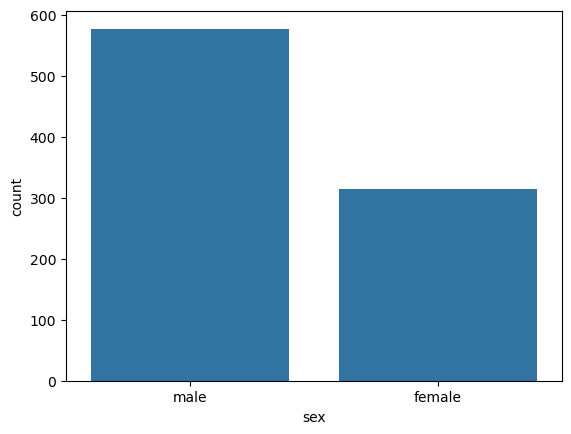

In [12]:
sns.countplot(data = titanic, x = 'sex')

We can display a count of the number rows in each category of values in the alive column

<Axes: xlabel='alive', ylabel='count'>

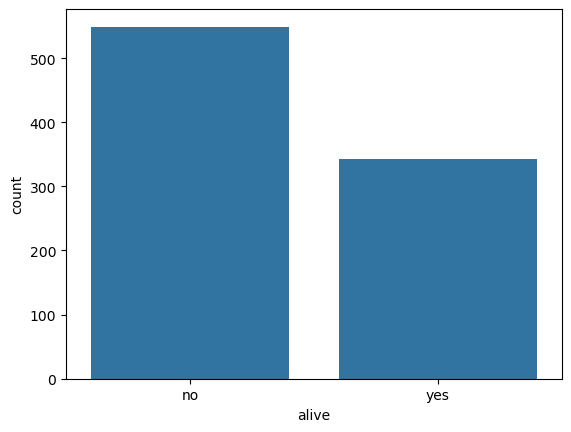

In [13]:
sns.countplot(data = titanic, x = 'alive')

## Distribution Plots

Distribution plots for continuous data variables.In the past, `Seaborn` had a `distplot` method which supported displaying a histogram plot by with kde on top default. `distplot` is deprecated and it is recommended we use `displot` or `histplot` for find grained control. `distplot` allow as to display a histogram of univariate or bivariate distribution of the data in a dataset.

<Axes: xlabel='alcohol', ylabel='Density'>

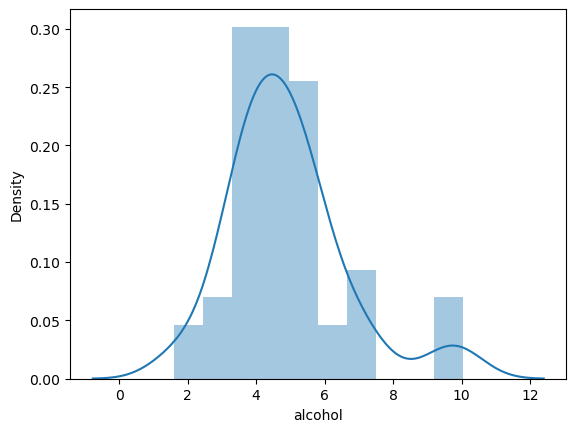

In [14]:
sns.distplot(a=crashes['alcohol'])
 

If we don't what the kde plot to be visible we can tell seaborn not to show it

<Axes: xlabel='alcohol'>

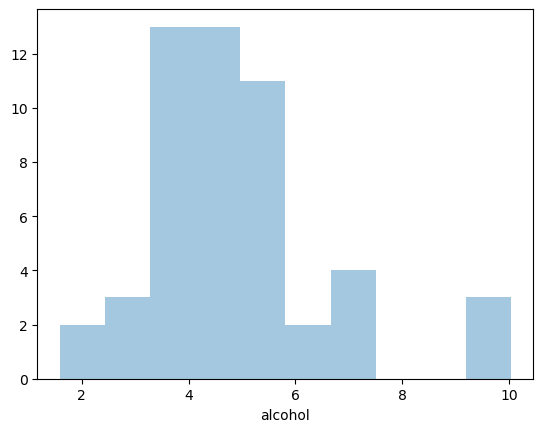

In [15]:
sns.distplot(a=crashes['alcohol'],kde=False)


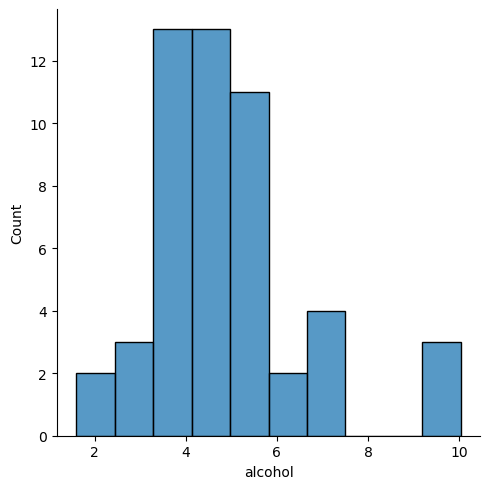

In [16]:
sns.displot(data=crashes['alcohol'])

The equivalent plot can be displayed using the new `displot` method

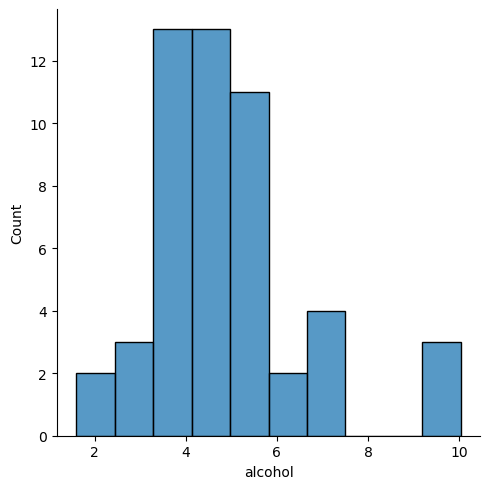

In [17]:
# We can specify name of the data column in the dataset if there are more than one
sns.displot(data=crashes, x='alcohol')

`displot`  combines a histogram with optional components, such as a Kernel Density Estimation (KDE) line or rug plot. We can specify which type we want to plot using the kind key (default is hist)

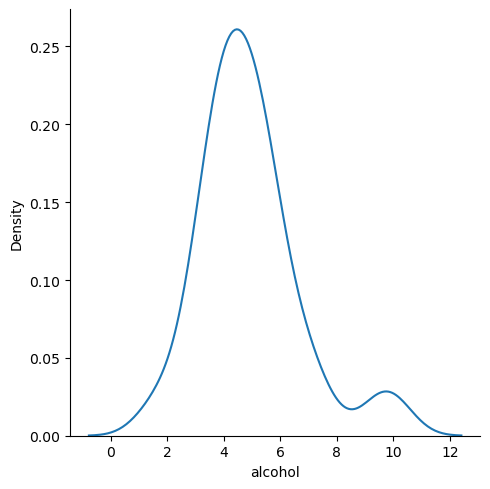

In [18]:
sns.displot(data=crashes['alcohol'], kind='kde')

We can enable an overlay of other visualization on top of the default. We can do this by passing a boolean value for the parameters `hist`, `ecdf`, `kde`, `rug`

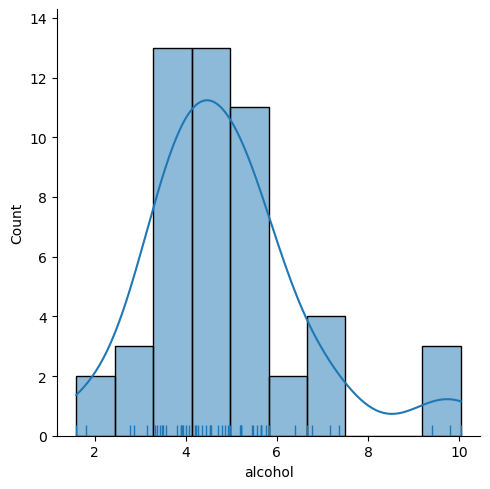

In [19]:
sns.displot(data=crashes['alcohol'], kde=True, rug=True)

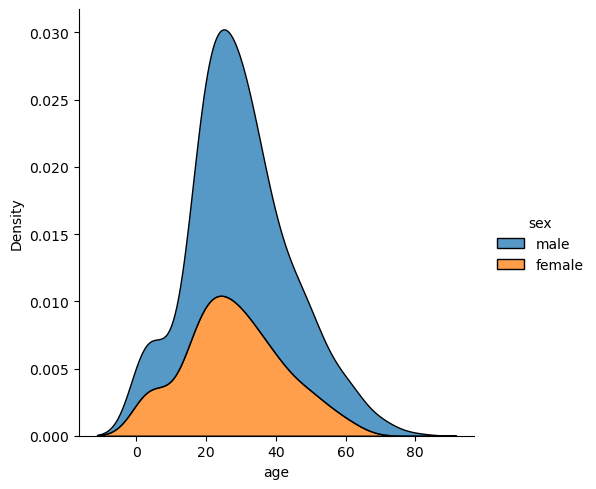

In [20]:
sns.displot(data=titanic, x='age', hue='sex', kind='kde', multiple='stack')

### KDE Plot
We can display kde plots using the `kdeplot` function as well

<Axes: xlabel='fare', ylabel='Density'>

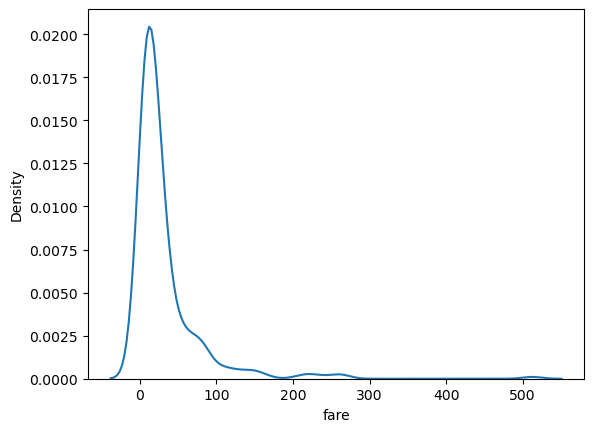

In [21]:
sns.kdeplot(data=titanic, x='fare')

## Categorical Plots

### Box Plot
Compare different variables

<Axes: xlabel='alive', ylabel='fare'>

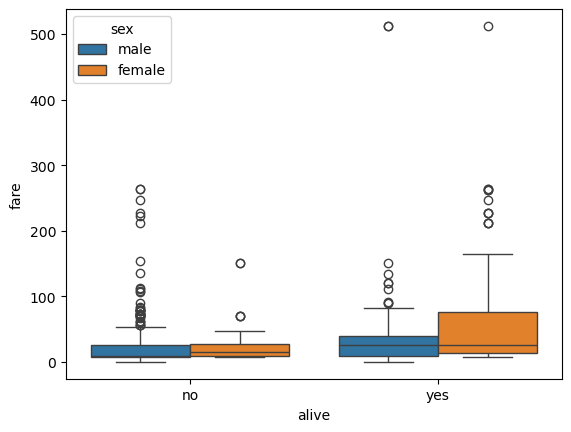

In [22]:
sns.boxplot(data = titanic, x = 'alive', y='fare', hue='sex')

### Violin Plot
Compare different variables in a different visualization 

<Axes: xlabel='alive', ylabel='fare'>

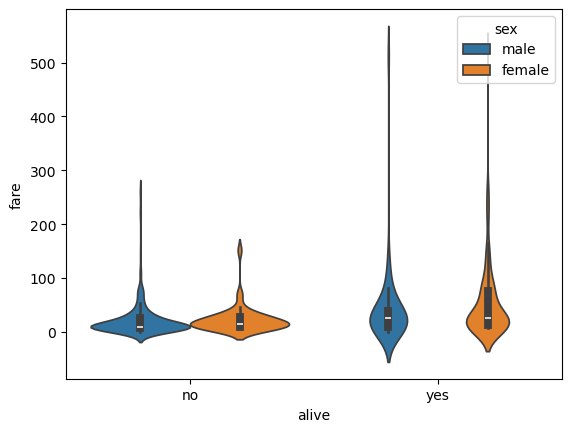

In [40]:
sns.violinplot(data = titanic, x = 'alive', y='fare', hue='sex')

<Axes: xlabel='alive', ylabel='fare'>

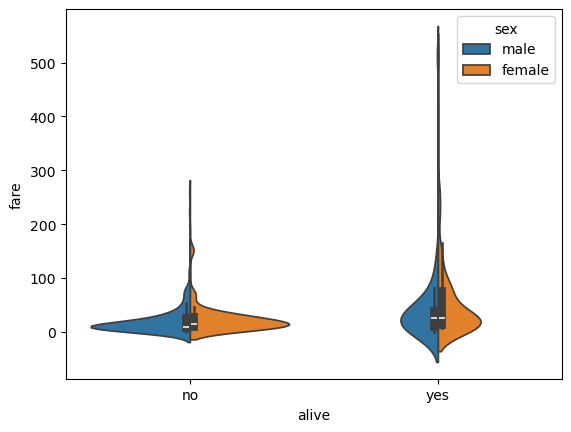

In [41]:
sns.violinplot(data = titanic, x = 'alive', y='fare', hue='sex', split=True)

<Axes: xlabel='alive', ylabel='fare'>

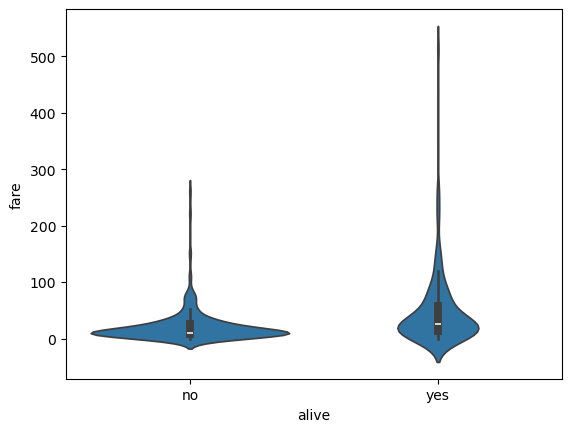

In [45]:
#survived	pclass	sex	age	sibsp	parch	fare	embarked	class	who	adult_male	deck	embark_town	alive	alone
sns.violinplot(data = titanic, x = 'alive', y='fare')

### Strip Plot


<Axes: xlabel='class', ylabel='fare'>

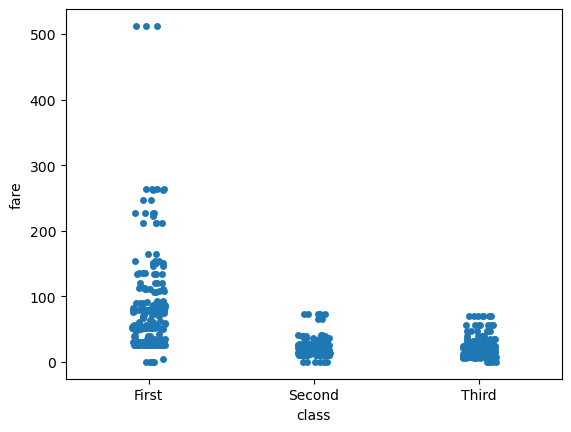

In [42]:
sns.stripplot(data = titanic, x = 'class', y='fare')

<Axes: xlabel='class', ylabel='fare'>

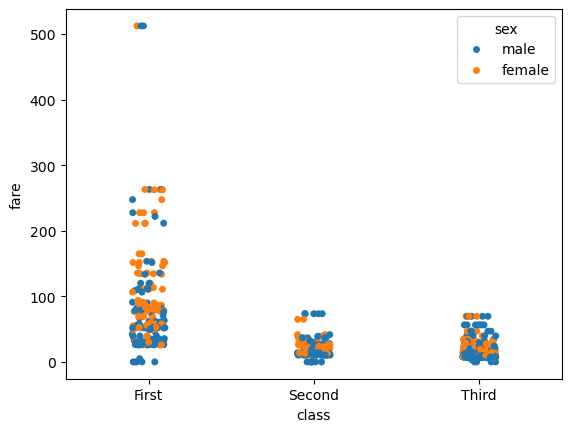

In [43]:
sns.stripplot(data = titanic, x = 'class', y='fare', hue='sex')

### Swarm Plot

<Axes: xlabel='alive', ylabel='fare'>

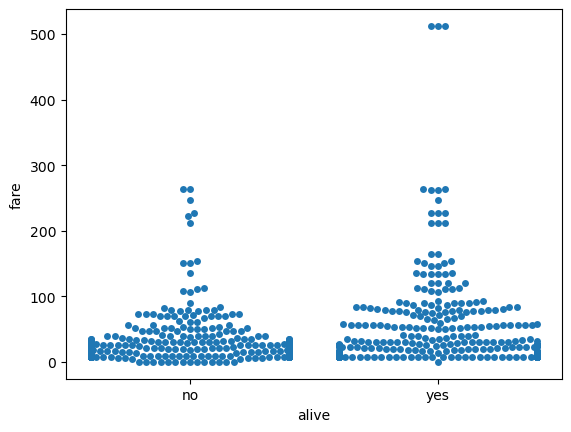

In [44]:
sns.swarmplot(data = titanic, x = 'alive', y='fare')

## Comparing Data

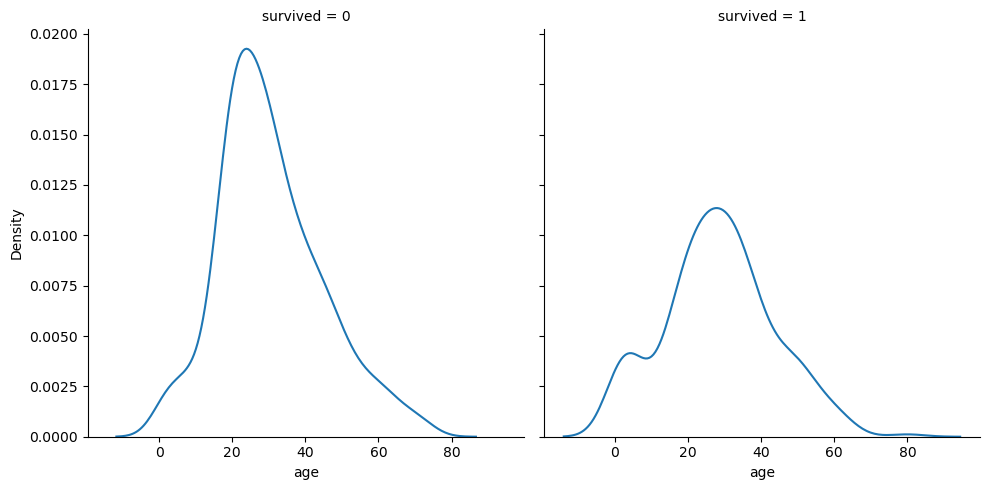

In [23]:
sns.displot(data=titanic, x='age', col='survived',  kind='kde')

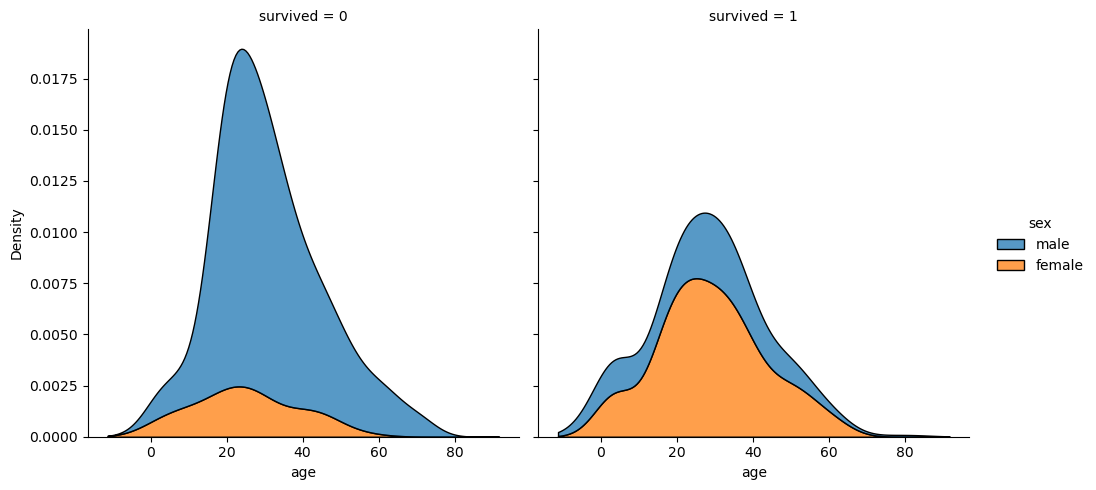

In [24]:
sns.displot(data=titanic, x='age', col='survived', hue='sex', kind='kde', multiple='stack')

### Joint Plot

Used for comparing two distributions. By default it uses scatter plot

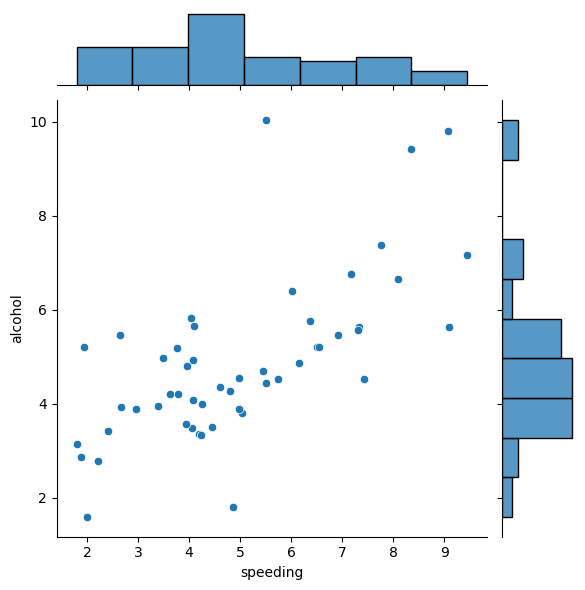

In [25]:
sns.jointplot(data=crashes, x='speeding',y='alcohol')

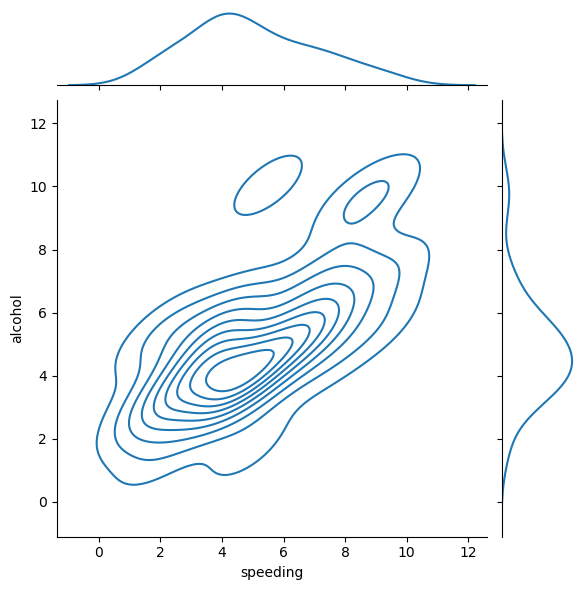

In [26]:
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='kde')

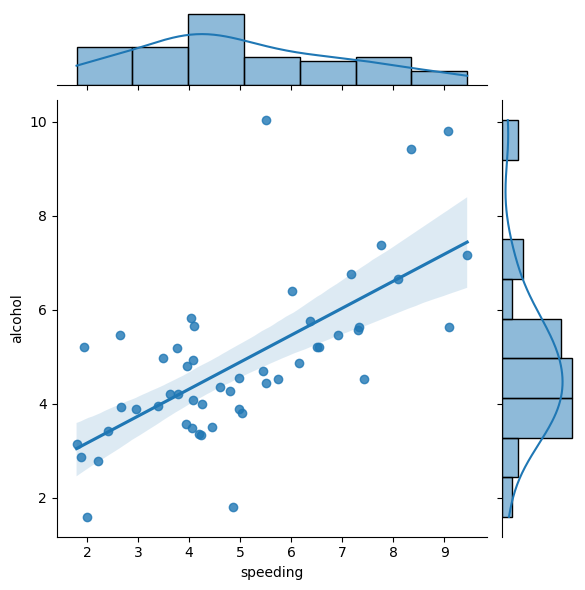

In [27]:
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg')

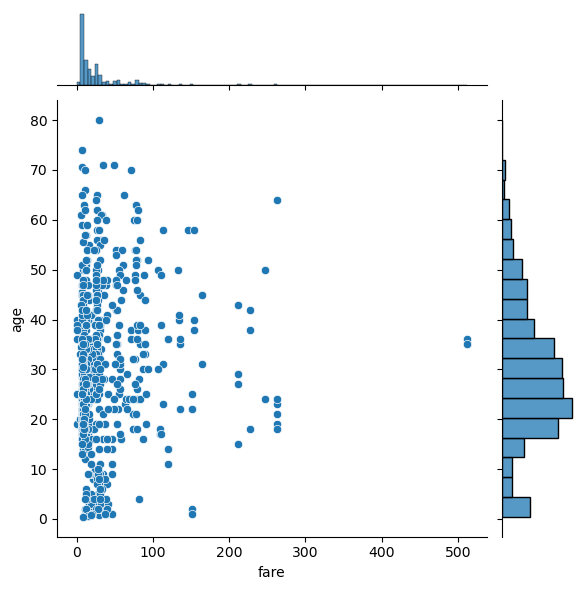

In [28]:
sns.jointplot(data=titanic, x='fare',y='age')

### Pair Plot

We can display pair plots across the entire dataset for each pair of numeric attributes

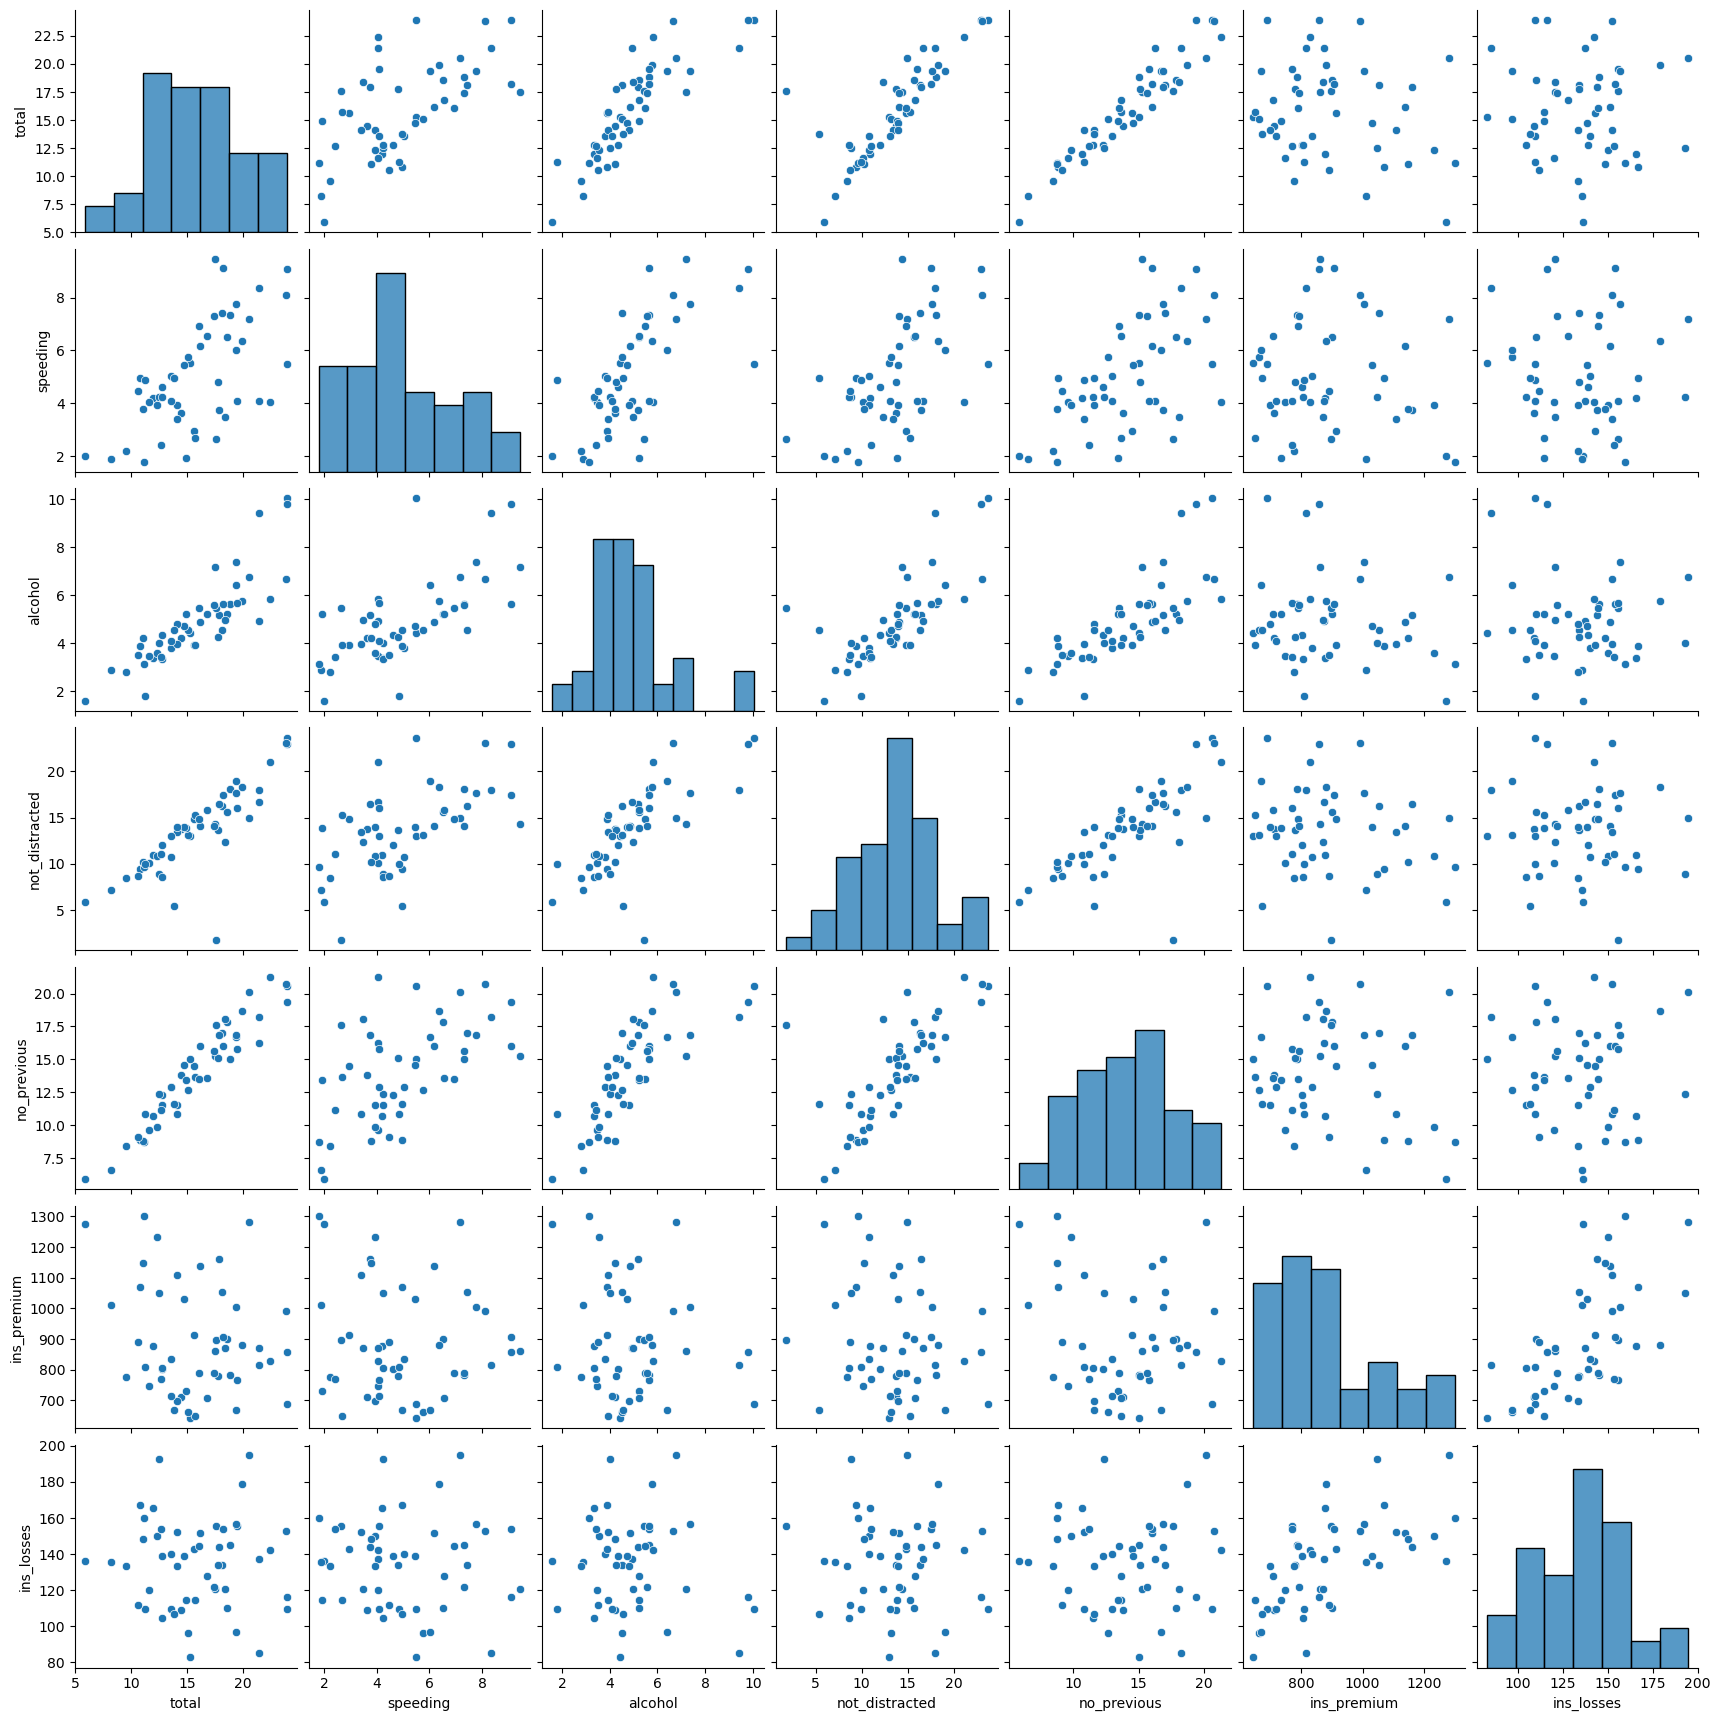

In [29]:
sns.pairplot(data=crashes)

We can use hue to have color palettes of categorical data

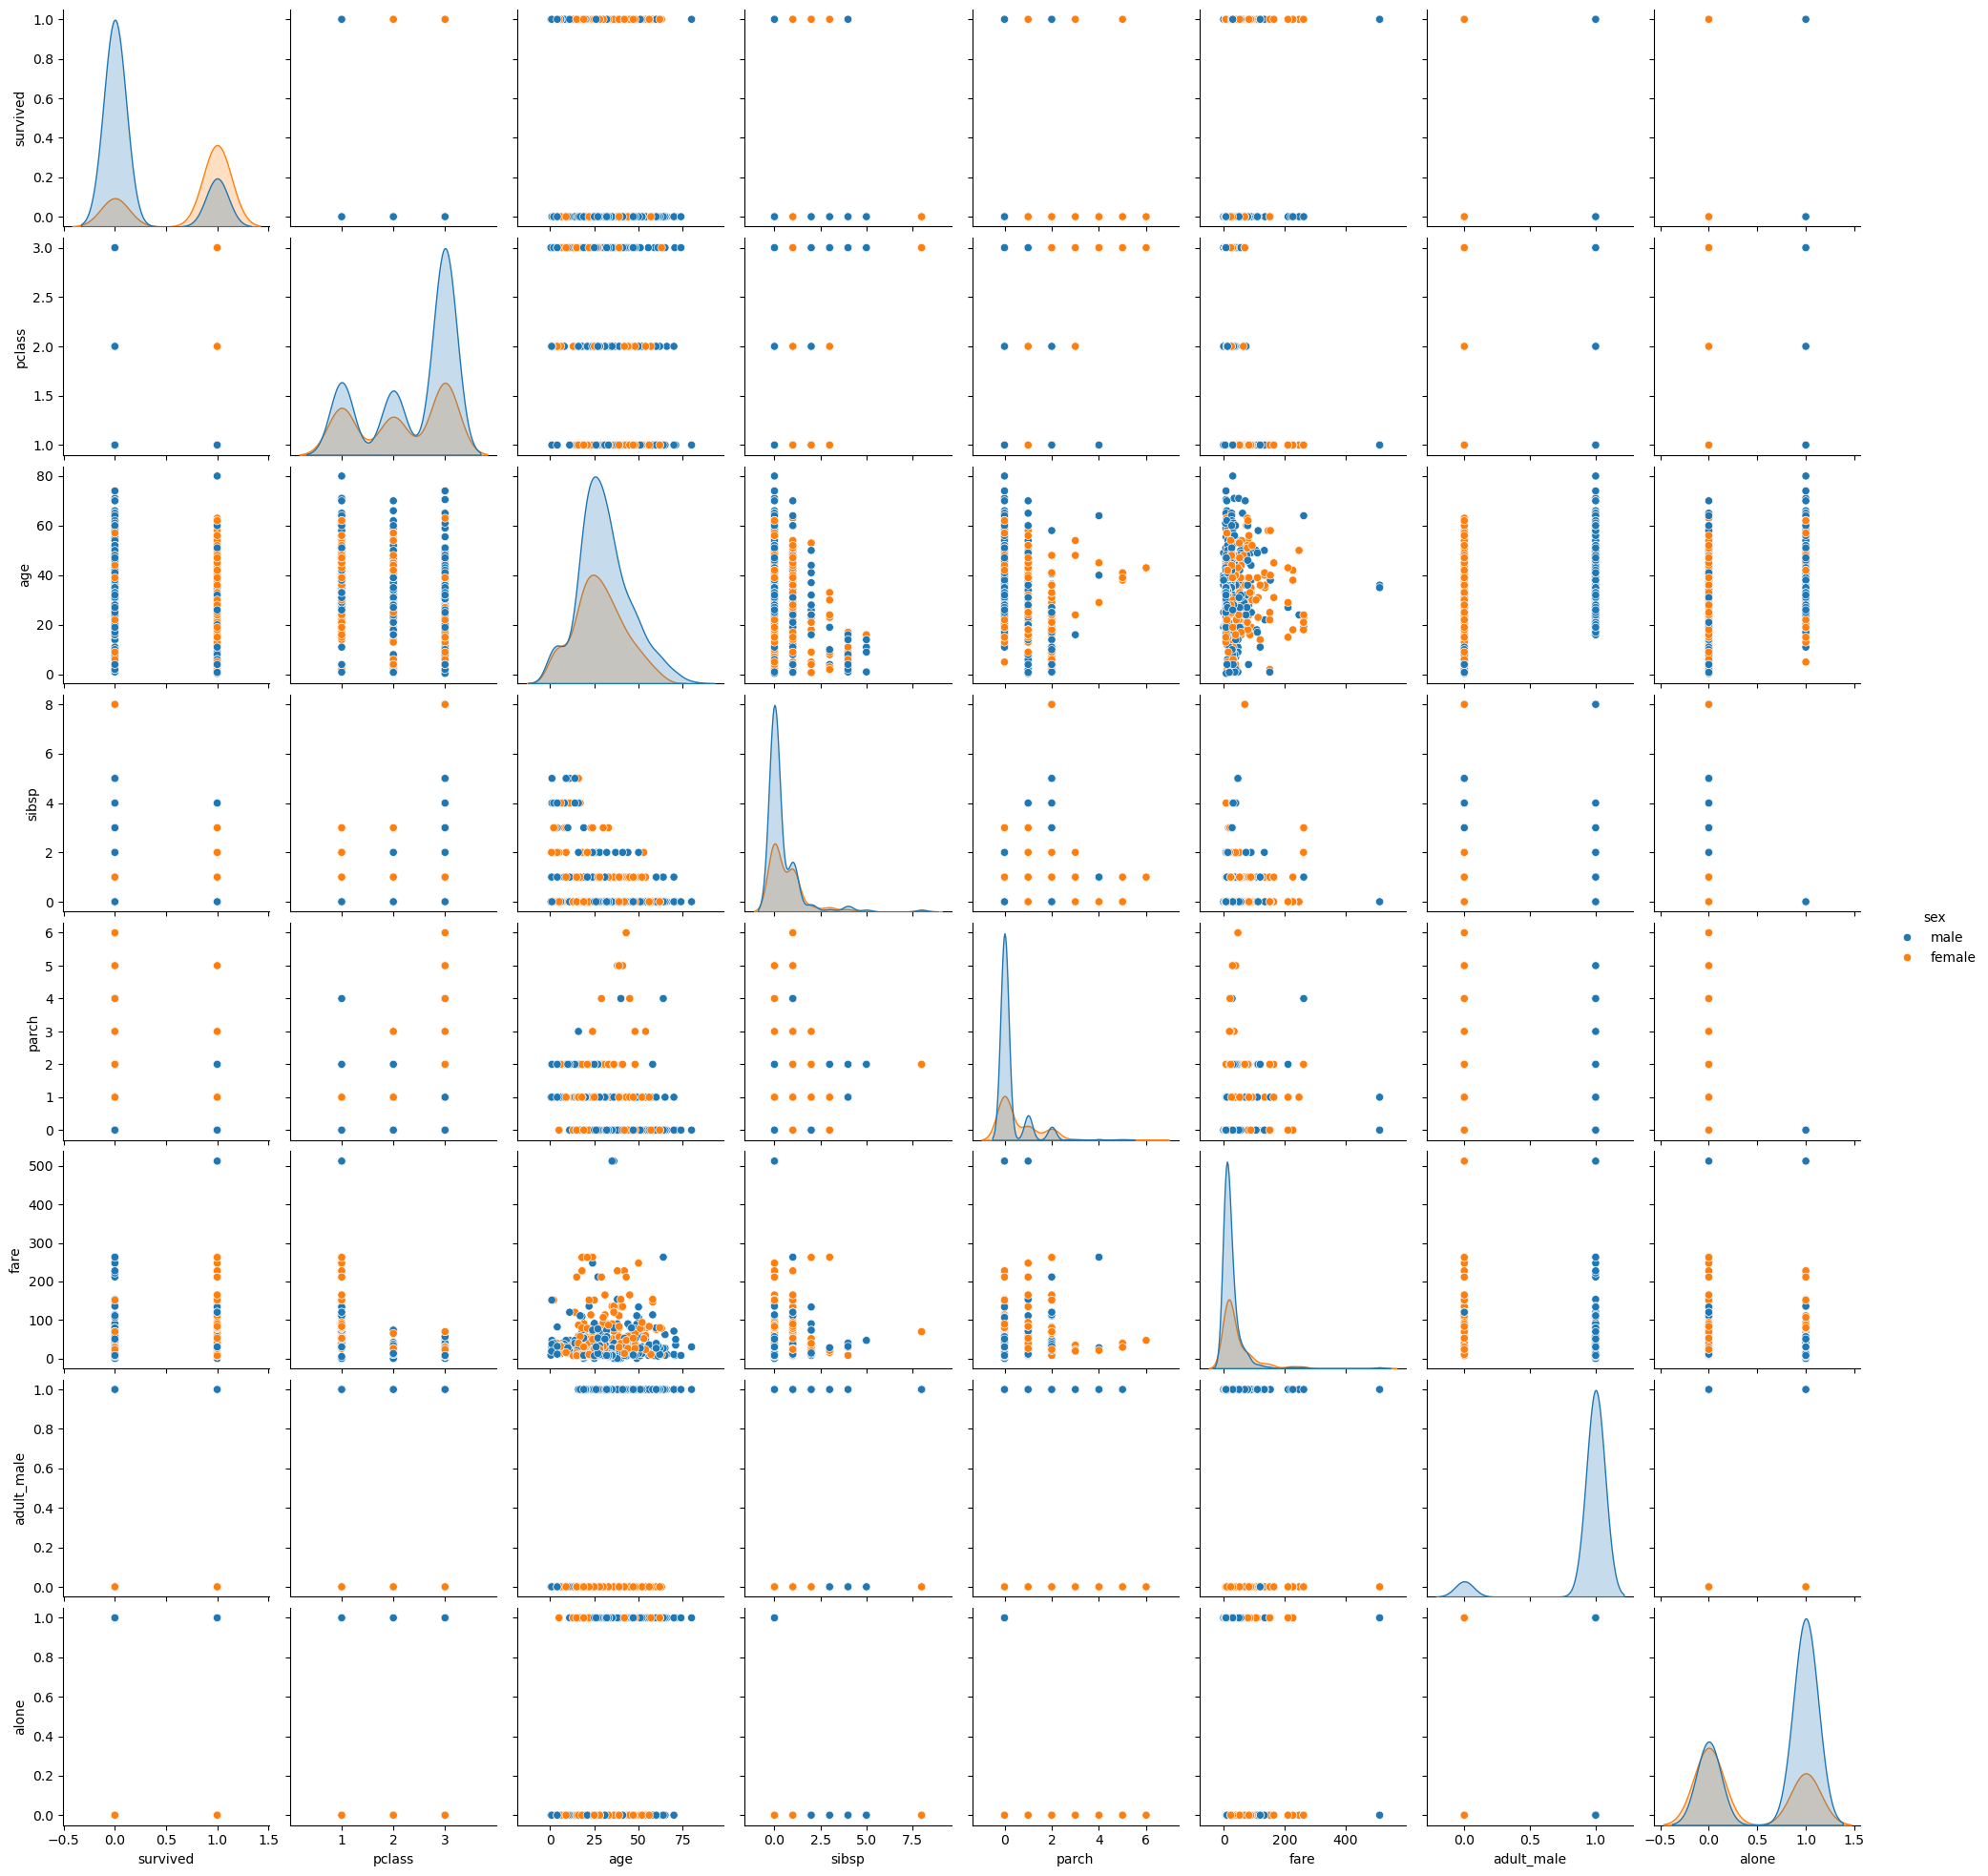

In [30]:
sns.pairplot(data=titanic, hue='sex')

<Axes: xlabel='alive', ylabel='fare'>

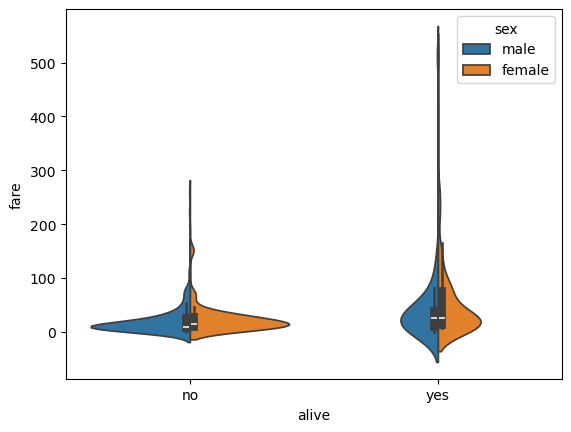

<Axes: xlabel='class', ylabel='fare'>

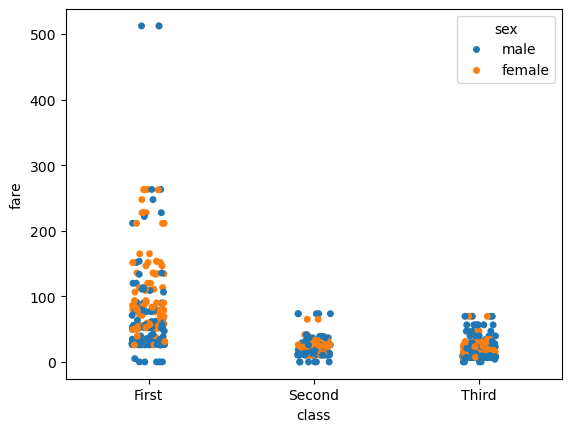

<Axes: xlabel='class', ylabel='fare'>

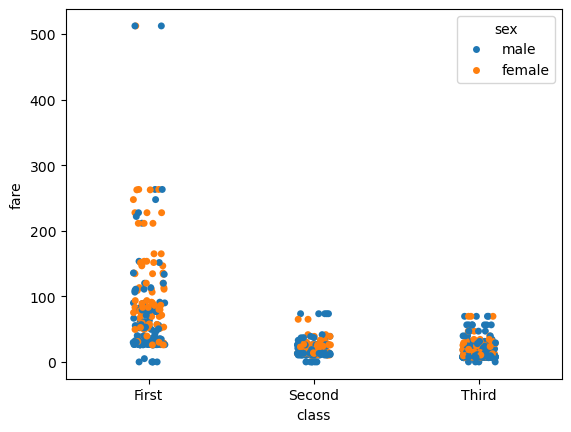

In [35]:
sns.stripplot(data = titanic, x = 'class', y='fare', hue='sex',jitter=True)

<Axes: xlabel='class', ylabel='fare'>

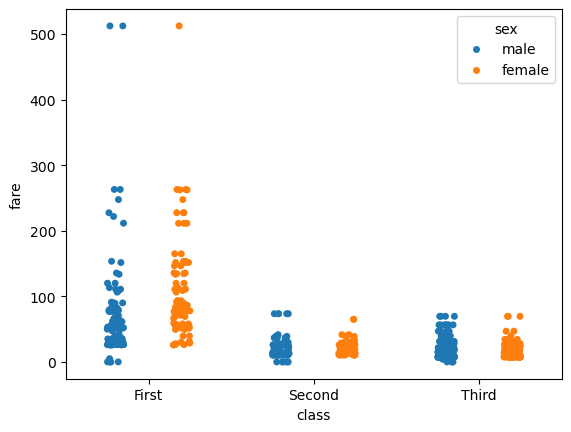

In [36]:
sns.stripplot(data = titanic, x = 'class', y='fare', hue='sex',jitter=True, dodge=True)

<Axes: xlabel='alive', ylabel='fare'>

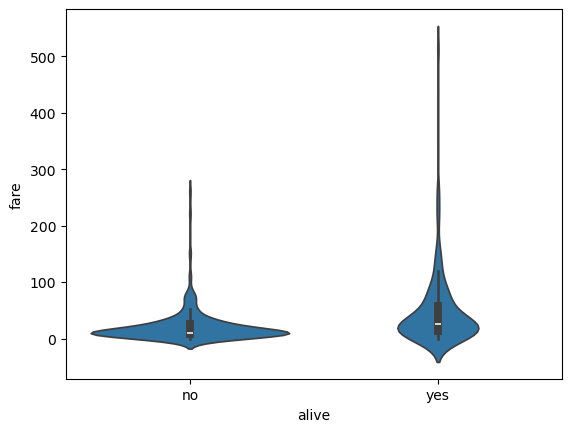

<Axes: xlabel='alive', ylabel='fare'>

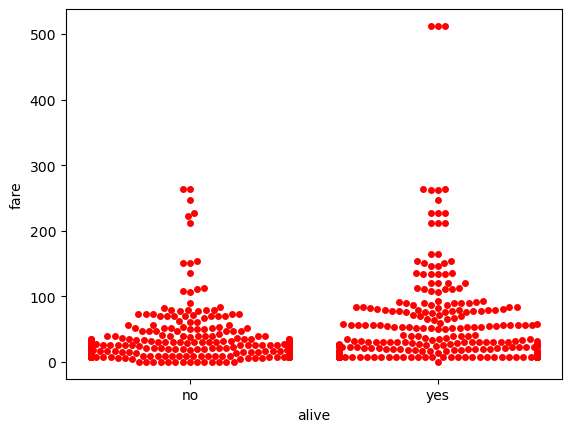

In [39]:
sns.swarmplot(data = titanic, x = 'alive', y='fare', color='red')

## Other Feature

### Resizing

We can resize the plot using `height`, `width` and `aspect` parameters 

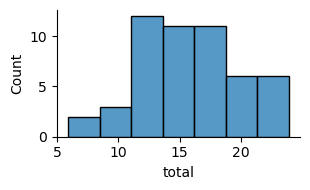

In [36]:
sns.displot(data = crashes, x = 'total', height = 2 , aspect = 1.6)

### Styling

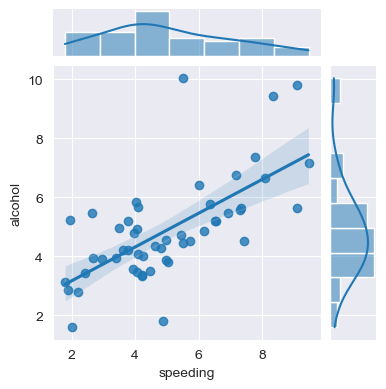

In [37]:
sns.set_style('darkgrid')
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg', height = 4 )

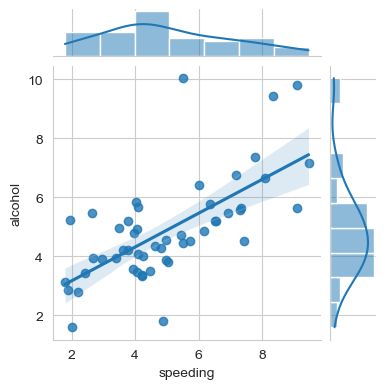

In [38]:
sns.set_style('whitegrid')
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg', height = 4 )

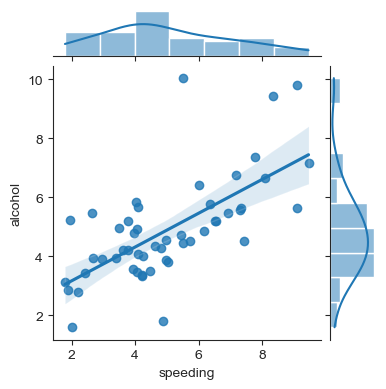

In [39]:
sns.set_style('ticks')
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg', height = 4 )

### Label Styling

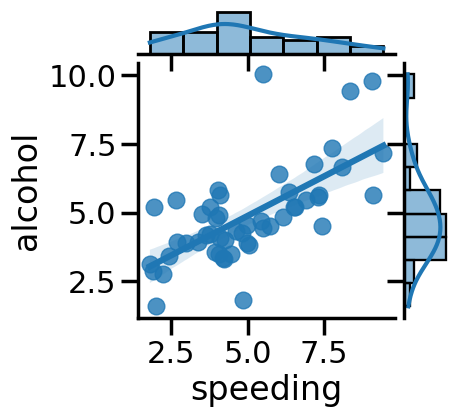

In [25]:
sns.set_context('poster')
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg', height = 4 )

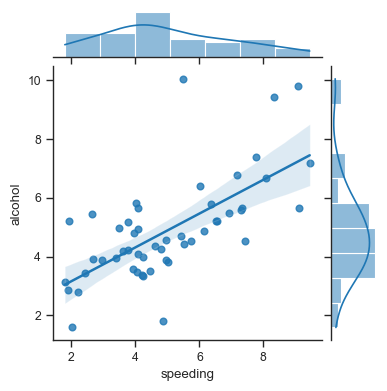

In [41]:
sns.set_context('paper')
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg', height = 4 )

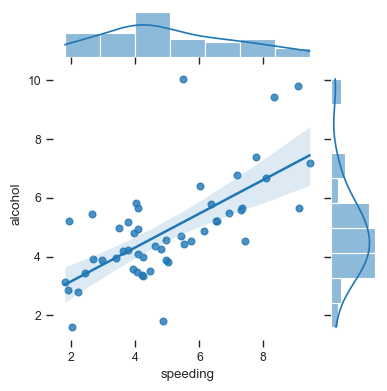

In [42]:
sns.jointplot(data=crashes, x='speeding',y='alcohol', kind='reg', height = 4 )
sns.despine(left=True, bottom=True) # False turns off the boundary 


### Save Plot

Since seaboarn is built on top of the `matplotlib` package, we can use `matplotlib`'s  `savefig()` function to save the generated plot into image file.\
__Note__: The `savefig()` function should come before the `show()` function since the later closes and deletes the image from the memory to save space.

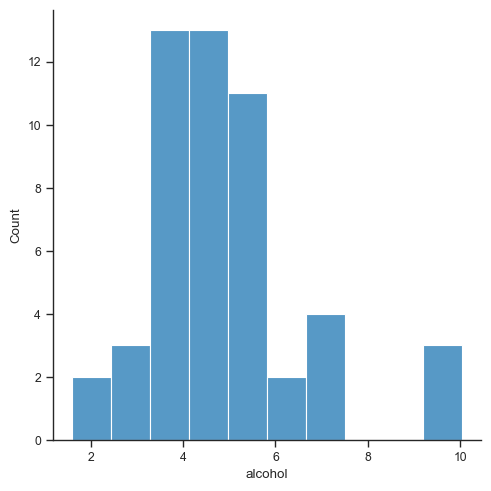

In [43]:
sns.displot(crashes['alcohol'])
plt.savefig('picture.png')
plt.show()